In [11]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [12]:
# Move Exported COCO data to: <repo>/PythonAPI/coco/
dataDir='./coco'
dataType='val2020'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [13]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [14]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
turtle_green turtle_green+head turtle_hawksbill turtle_hawksbill+head turtle_oliveridley turtle_oliveridley+head

COCO supercategories: 
animal


In [15]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=nms);
imgIds = coco.getImgIds(catIds=catIds);
imgIds = coco.getImgIds(imgIds = [1192])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img)

{'license': 3, 'file_name': 'Turtle43-LS.jpg', 'coco_url': None, 'height': 1800, 'width': 2400, 'date_captured': '2014-07-28 15:38:20', 'flickr_url': None, 'id': 1192, 'uuid': '92988981-33d5-f55a-bc90-6d36100c8c8d'}


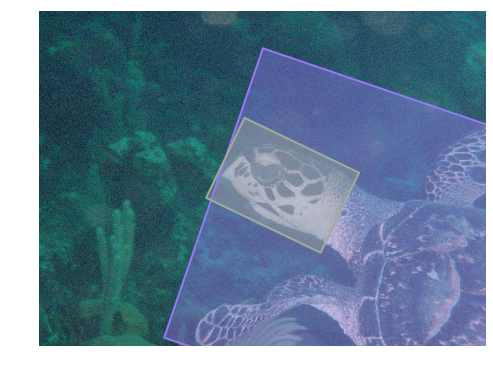

In [16]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)